In [35]:
# Programming assignment 3:
# Worked By:
# V Vishal Arvin           : Z23748136
# Makineni Sai Deepthi     : Z23705152

In [48]:
import numpy as np
import itertools
import random
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

alphas = [0,1/5,2/5,3/5,4/5,1]
lmbdas = [10**(-2),10**(-1),10**(0),10**(1),10**(2),10**(3),10**(4),10**(5),10**(6)]


def BeetaGenerator(l_Limit,u_Limit):   
    B_List = []
    while len(B_List) < 9:
        random_value = random.uniform(l_Limit,u_Limit)
        
        if random_value not in B_List:
            B_List.append(random_value)
            
    return B_List

def DummyVariableAppender(length_matrix,matrix):
    for i in range (0,length_matrix):
        if (matrix[i][6] == "Female"):
            matrix[i][6] = '0'
        elif (matrix[i][6] == "Male"):
            matrix[i][6] = '1'

        if (matrix[i][7] == "Yes"):
            matrix[i][7] = '1'
        elif (matrix[i][7] == "No"):
            matrix[i][7] = '0'

        if (matrix[i][8] == "Yes"):
            matrix[i][8] = '1'
        elif (matrix[i][8] == "No"):
            matrix[i][8] = '0'
            
def CenteringAndStandardizing(D_matrix,y_Matrix):
    D_mean = np.mean(D_matrix, axis = 0)
    Y_mean = np.mean(y_Matrix, axis = 0)

    
    D_matrix = D_matrix - np.array(D_mean, dtype=float)
    y_Matrix = y_Matrix - Y_mean
    
    
    D_std = np.std(D_matrix, axis = 0)
    D_matrix = np.divide(D_matrix, np.array(D_std, dtype=float))
        
    return [D_matrix,y_Matrix]


def akCalculator(matrix,responsematrix,beetavalue,index):
    indexColumn = matrix[:,index]
    indexColumn1 = np.transpose(indexColumn)
    y_xbeeta = responsematrix - np.dot(matrix,beetavalue)
    xbeeta = np.multiply(indexColumn,beetavalue[index])
    y_xbeetaplusxbeeta = y_xbeeta + xbeeta
    a_k = np.dot(indexColumn1,y_xbeetaplusxbeeta)
    return a_k

def bkcalculator(ak,lmbda,alpha,bk,beeta):
    aksign = np.sign(ak)
    ak = abs(ak)
    value1 = ak - ((lmbda*(1-alpha))/2)
    if value1<0:
        bkmul = 0
    else:
        bkmul = value1
    beeta = (aksign*(bkmul))/(bk + (lmbda*alpha))
    return beeta

def CVCalculator(batches, lmbda, alpha, bk, matrix, response, Originalbeeta):    
    MSElist = []
    for z in range(len(batches)):
        validationset = []
        validationsetResponse = []
        trainingset = []
        trainingsetResponse = []
        beeta = Originalbeeta
        
        for i in batches[z][0]:
            validationset.append(matrix[i])
            validationsetResponse.append(response[i])
        for j in batches[z][1]:
            trainingset.append(matrix[j])
            trainingsetResponse.append(response[j])
    
        validationset = np.array(validationset)
        validationsetResponse = np.array(validationsetResponse)
        trainingset = np.array(trainingset)
        trainingsetResponse = np.array(trainingsetResponse)
        
        trainingsetmean = np.mean(trainingset, axis=0)
        trainingresponsemean = np.mean(trainingsetResponse, axis=0)
        trainingsetstd = np.nanstd(trainingset, axis=0)
    
        trainingset = np.divide((trainingset - trainingsetmean), trainingsetstd)
        trainingsetResponse = trainingsetResponse - trainingresponsemean
        
        validationset = np.divide((validationset - trainingsetmean), trainingsetstd)
        validationsetResponse = validationsetResponse - trainingresponsemean
    
        shapeDmatrix = np.shape(trainingset)
        
        
        for s in range(1000):  # Iterating 1000 times
            for k in range(shapeDmatrix[1]):
                ak = akCalculator(trainingset, trainingsetResponse, beeta, k)
                b_k = np.sum(trainingset[:,k] ** 2)
                beetak = bkcalculator(ak, lmbda, alpha, b_k, beeta[k])
                beeta[k] = beetak

        
        modelResponse = np.matmul(validationset, beeta)
        MSE = np.mean((validationsetResponse - modelResponse) ** 2)
        MSElist.append(MSE)
     
    cvsum = sum(MSElist)
    CV = cvsum / len(batches)
    return CV



In [37]:
D_matrix = np.loadtxt("Credit_N400_p9.csv",skiprows=1,usecols=[0,1,2,3,4,5,6,7,8],delimiter=',',dtype=object) 
y_Matrix = np.loadtxt("Credit_N400_p9.csv",skiprows=1,usecols=[9],delimiter=',',dtype=object)

DummyVariableAppender(len(D_matrix),D_matrix)
        
beeta = BeetaGenerator(-1,1)
beeta.sort()
beeta_1 = beeta


D_matrix = np.array(D_matrix, dtype=float)
y_Matrix = np.array(y_Matrix, dtype = float)

D_matrix1 = np.array(D_matrix, dtype=float)
y_Matrix1 = np.array(y_Matrix, dtype = float)


D_matrix,y_Matrix = CenteringAndStandardizing(D_matrix,y_Matrix)

bk = []
shapeDmatrix = np.shape(D_matrix)



for j in range (shapeDmatrix[1]):
    addSum = 0
    for i in range (shapeDmatrix[0]):
        xijSquare = np.square(D_matrix[i][j])
        addSum = addSum + xijSquare
    bk.append(round(addSum))


alphaLabels = ['alpha_0','alpha_0.2','alpha_0.4','alpha_0.6','alpha_0.8','alpha_1']


In [38]:
for alphaIndex in range(len(alphas)):
    alphaLabels[alphaIndex] = [] #alpha[0]
    alpha = alphas[alphaIndex] #[0]
    for lmbda in lmbdas: #10^-2
        beetacopy = beeta #beetas copied to beetacopy
        beetacopy = np.array(beetacopy)
        for s in range(1000): #this will run for 1000 times
            for k in range(shapeDmatrix[1]):   #k will be 0,1,2,3,4,5,6,7,8
                ak = akCalculator(D_matrix,y_Matrix,beetacopy,k) #it will return ak for first column
                beetak = bkcalculator(ak,lmbda,alpha,bk[k],beetacopy[k]) #returns beeta1 
                beetacopy[k]=beetak #modifying the beeta at index k
        alphaLabels[alphaIndex].append(beetacopy)
                
alphaLabels = np.array(alphaLabels)
print(np.shape(alphaLabels))


(6, 9, 9)


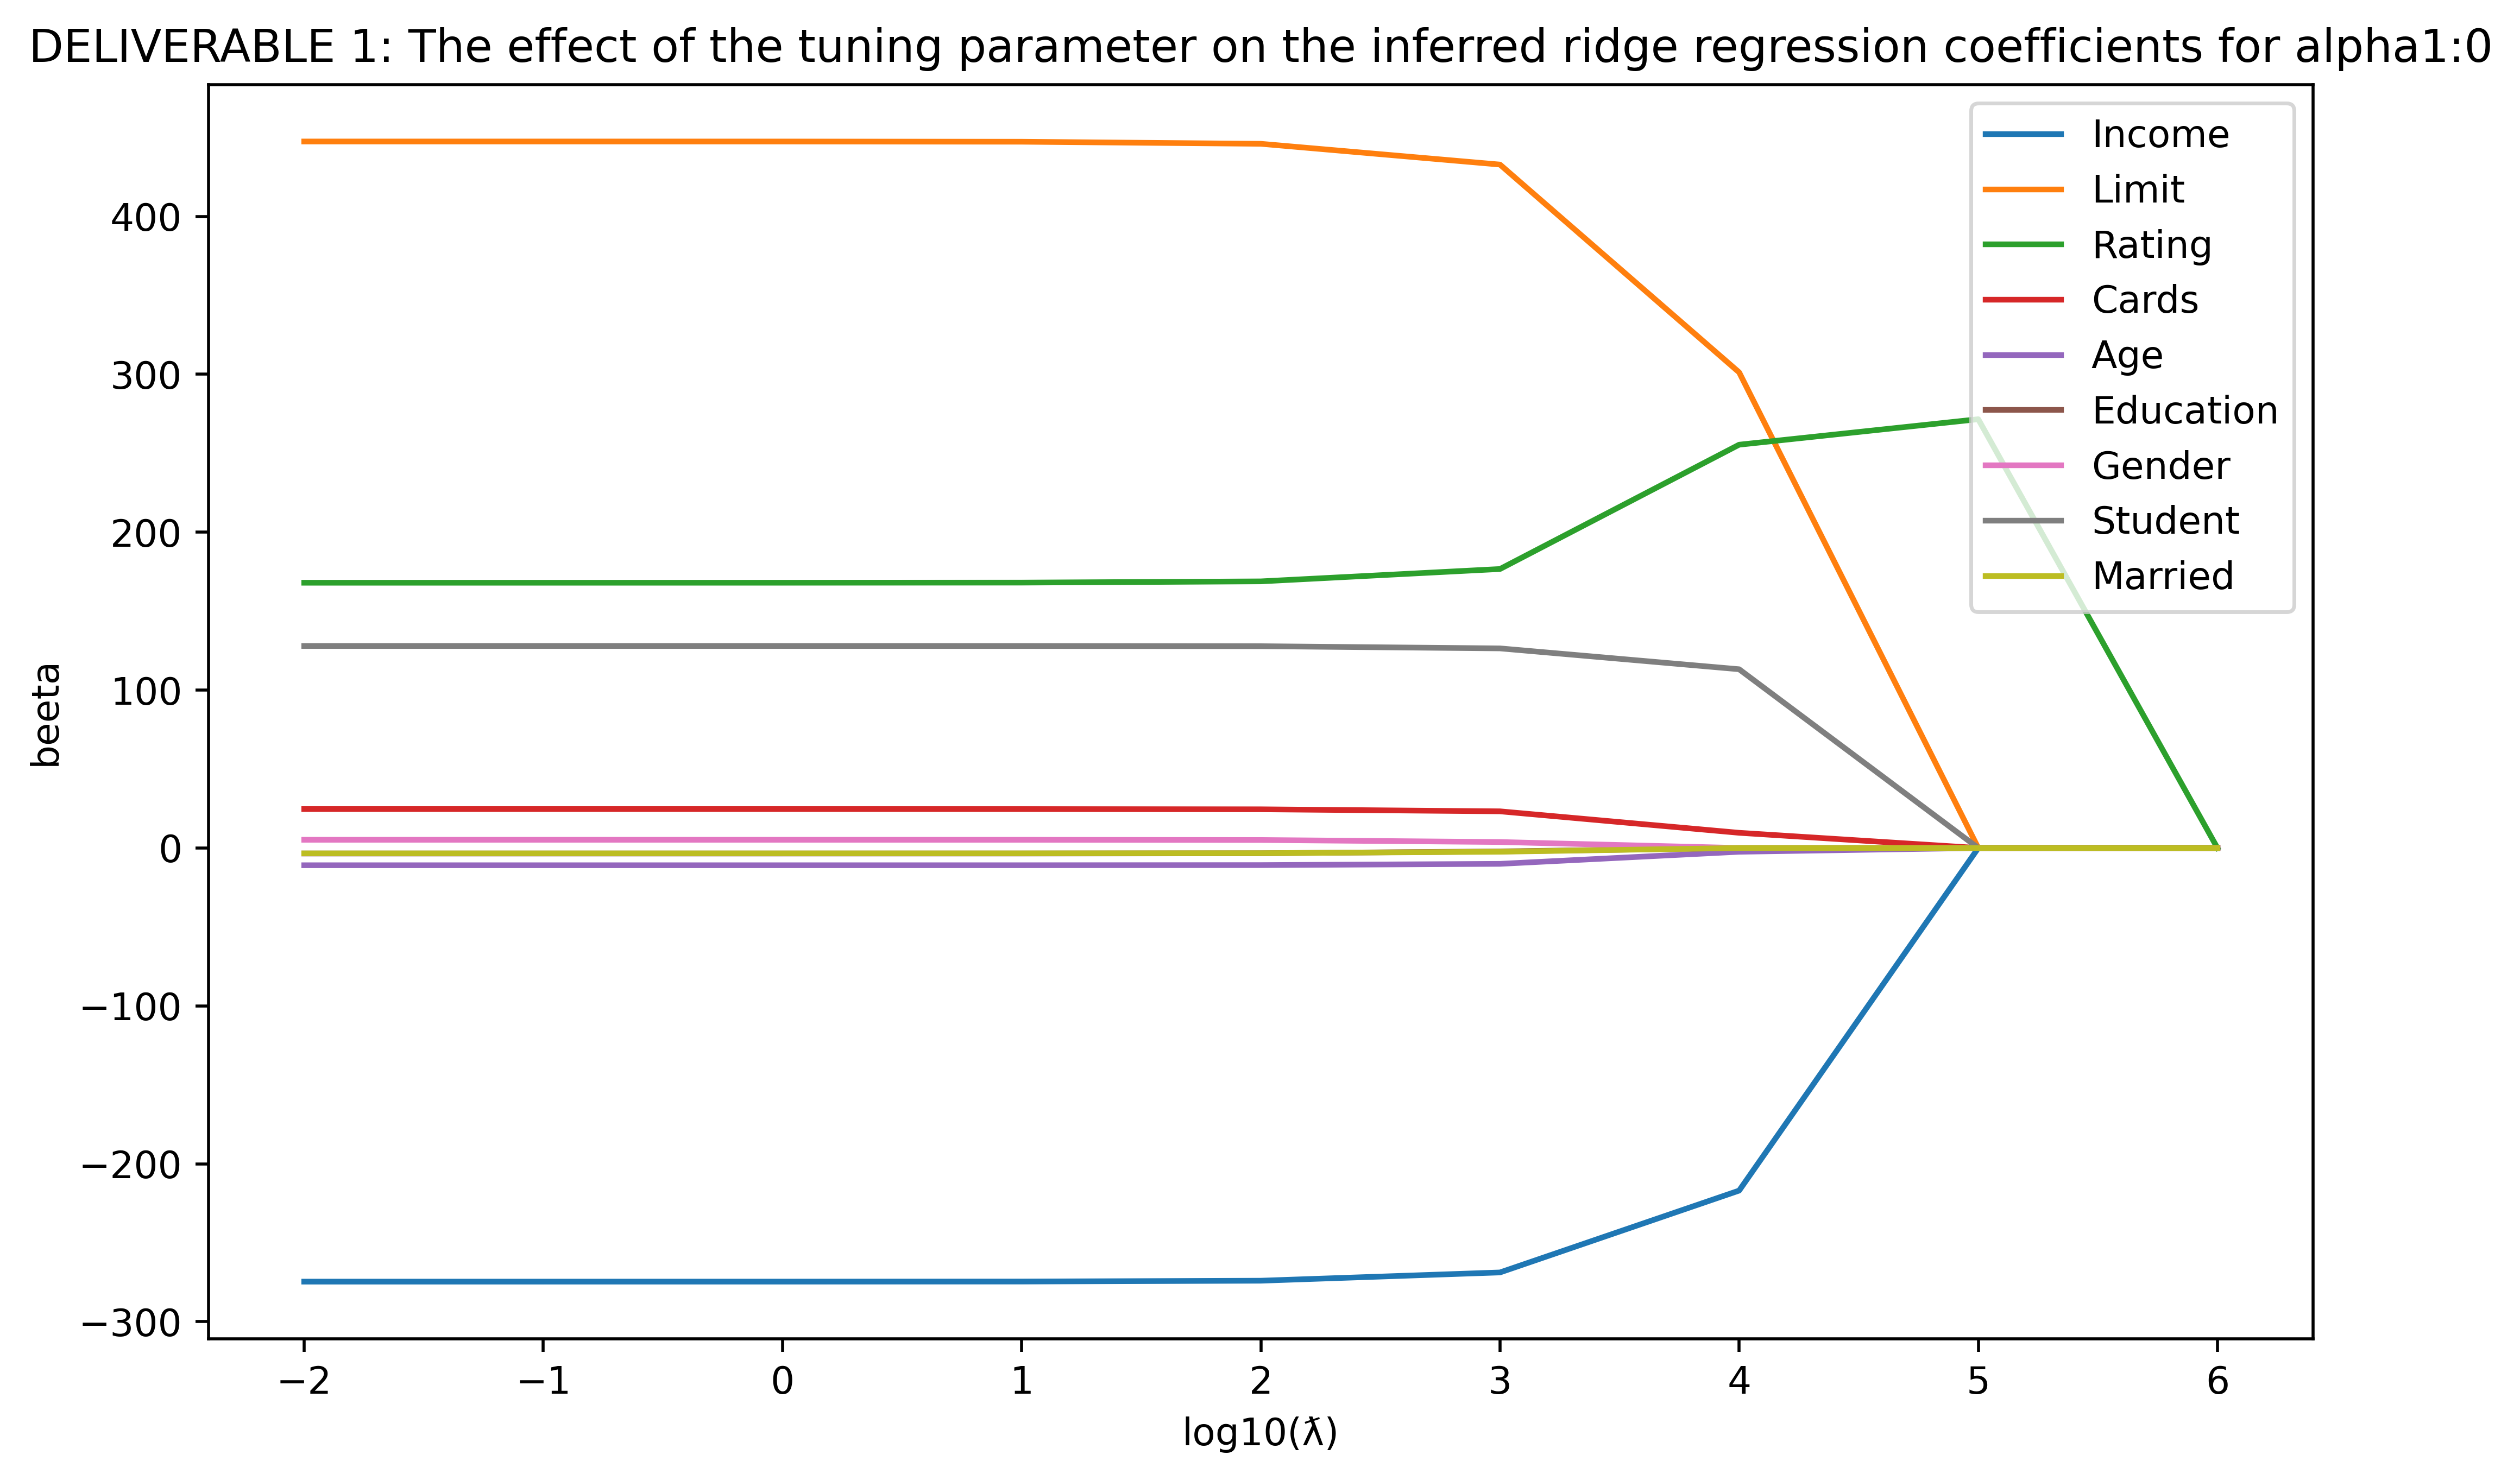

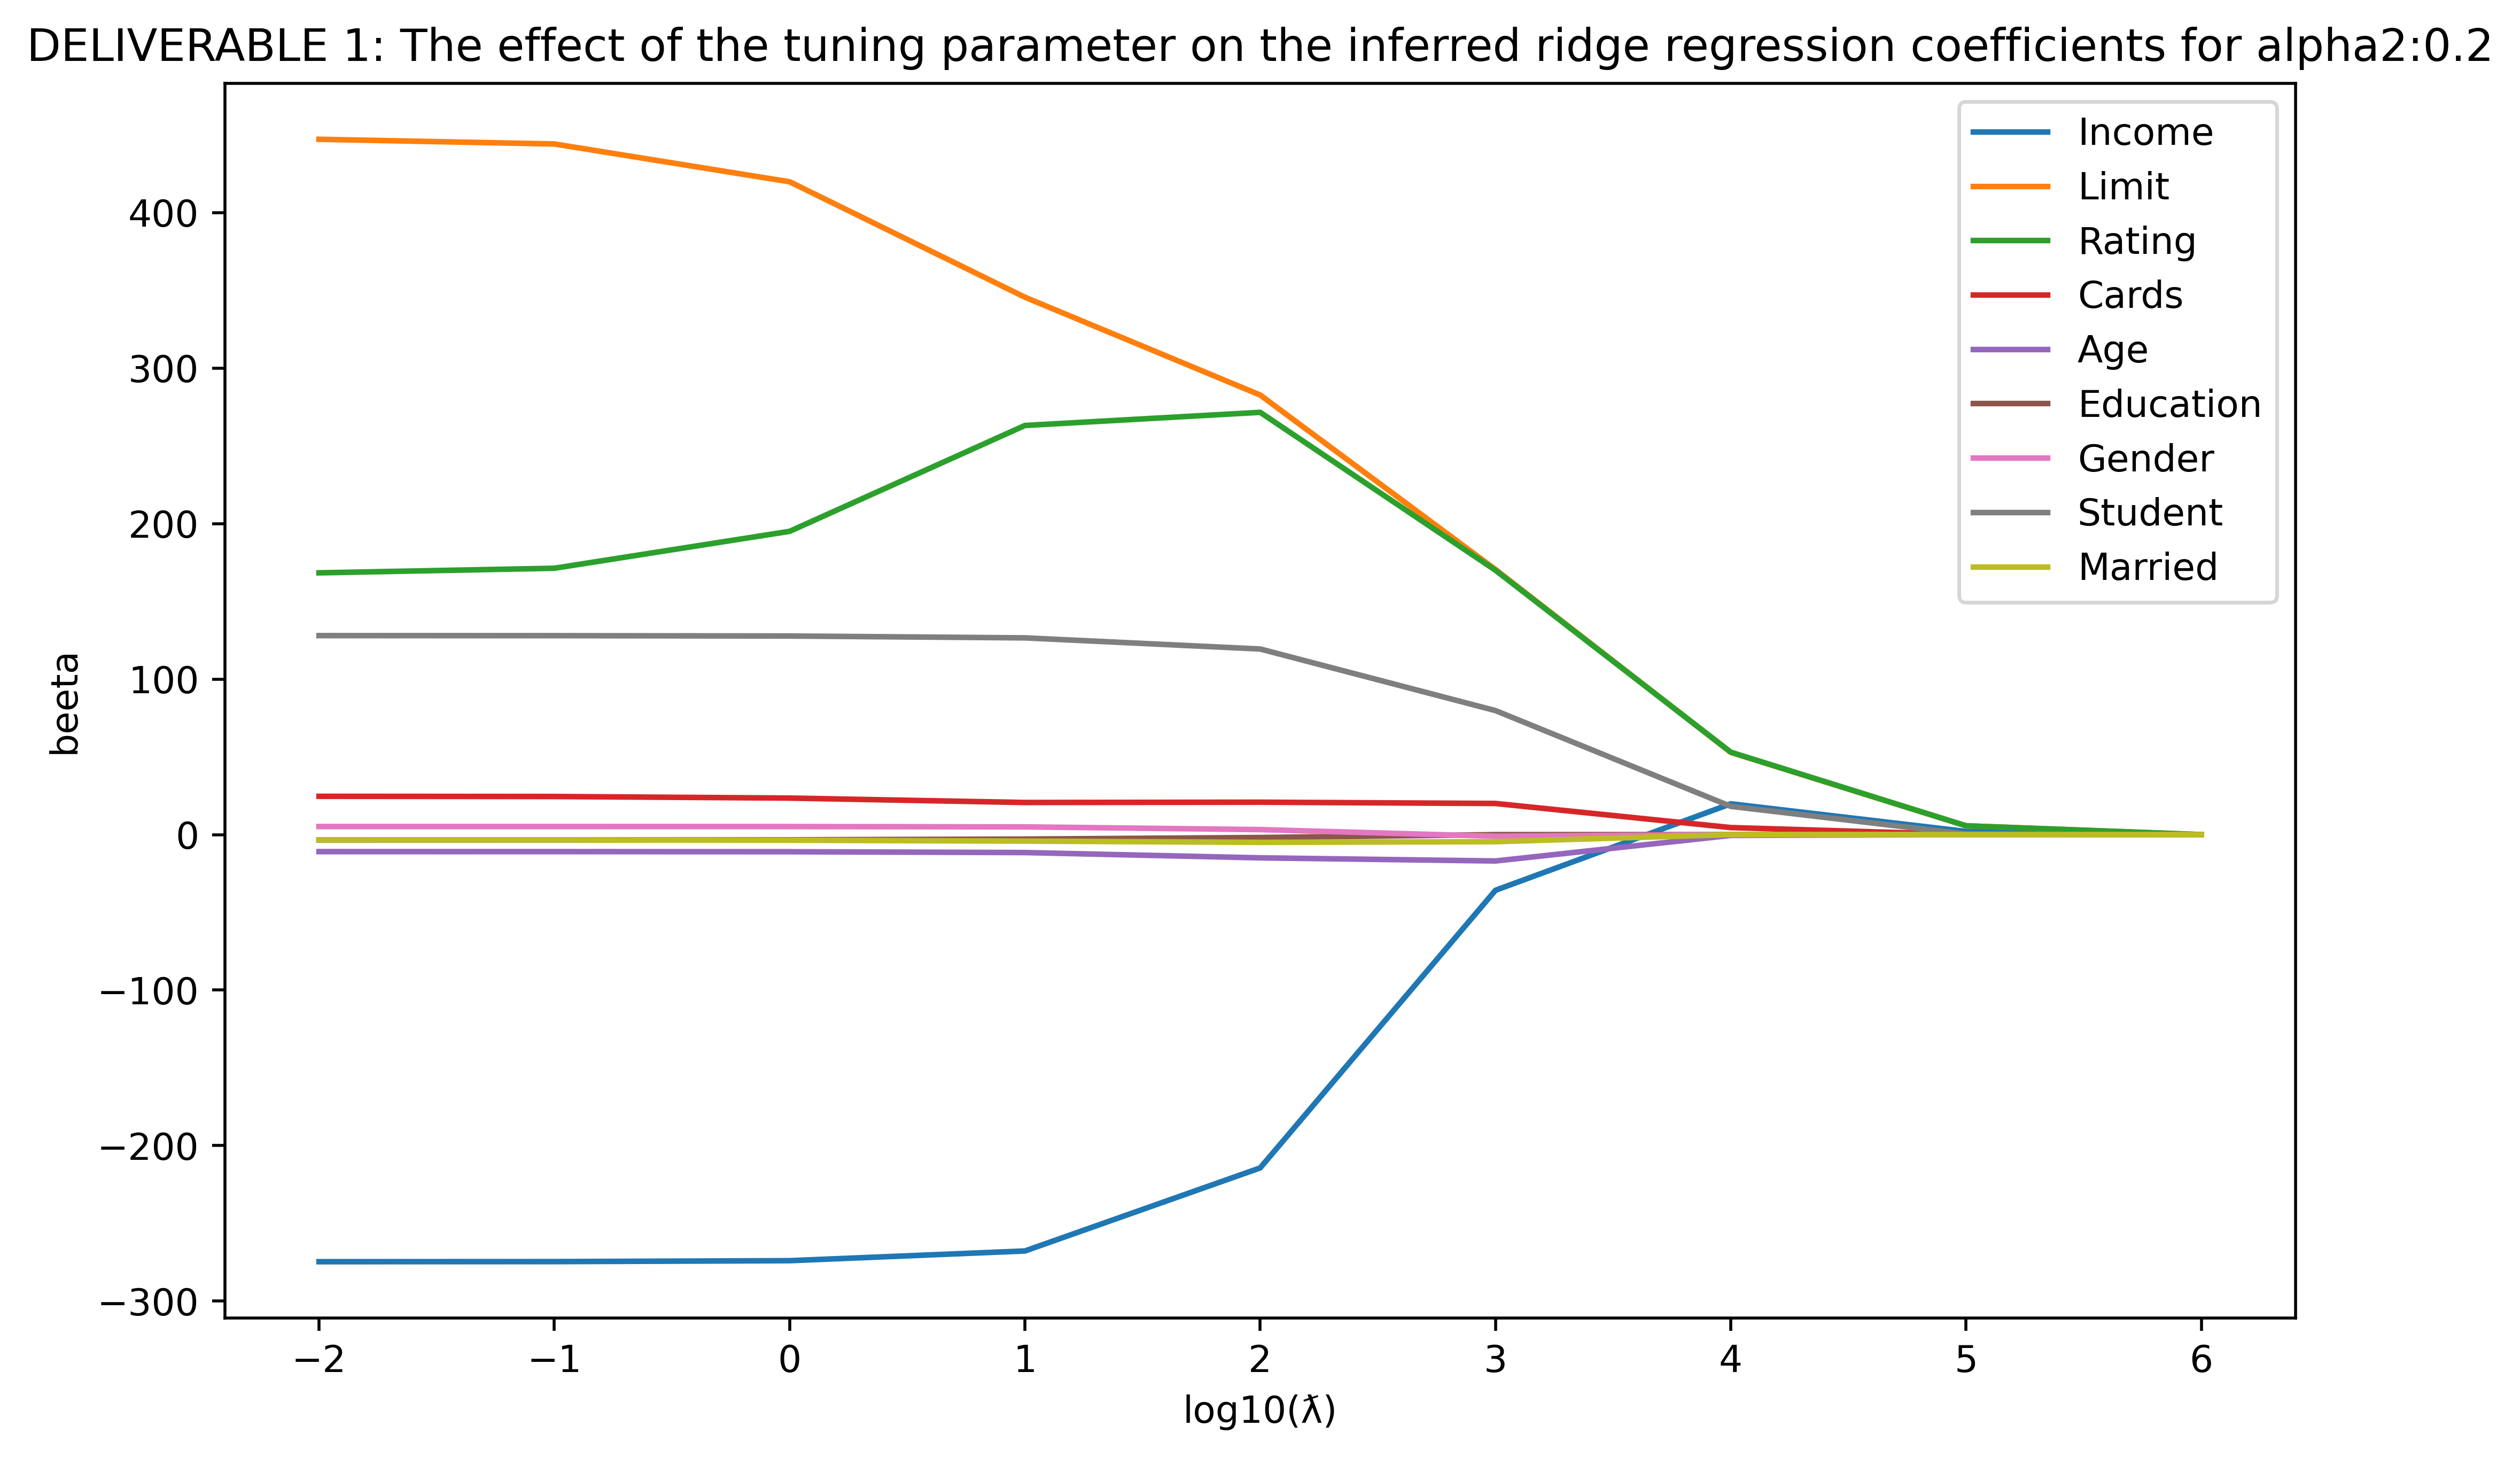

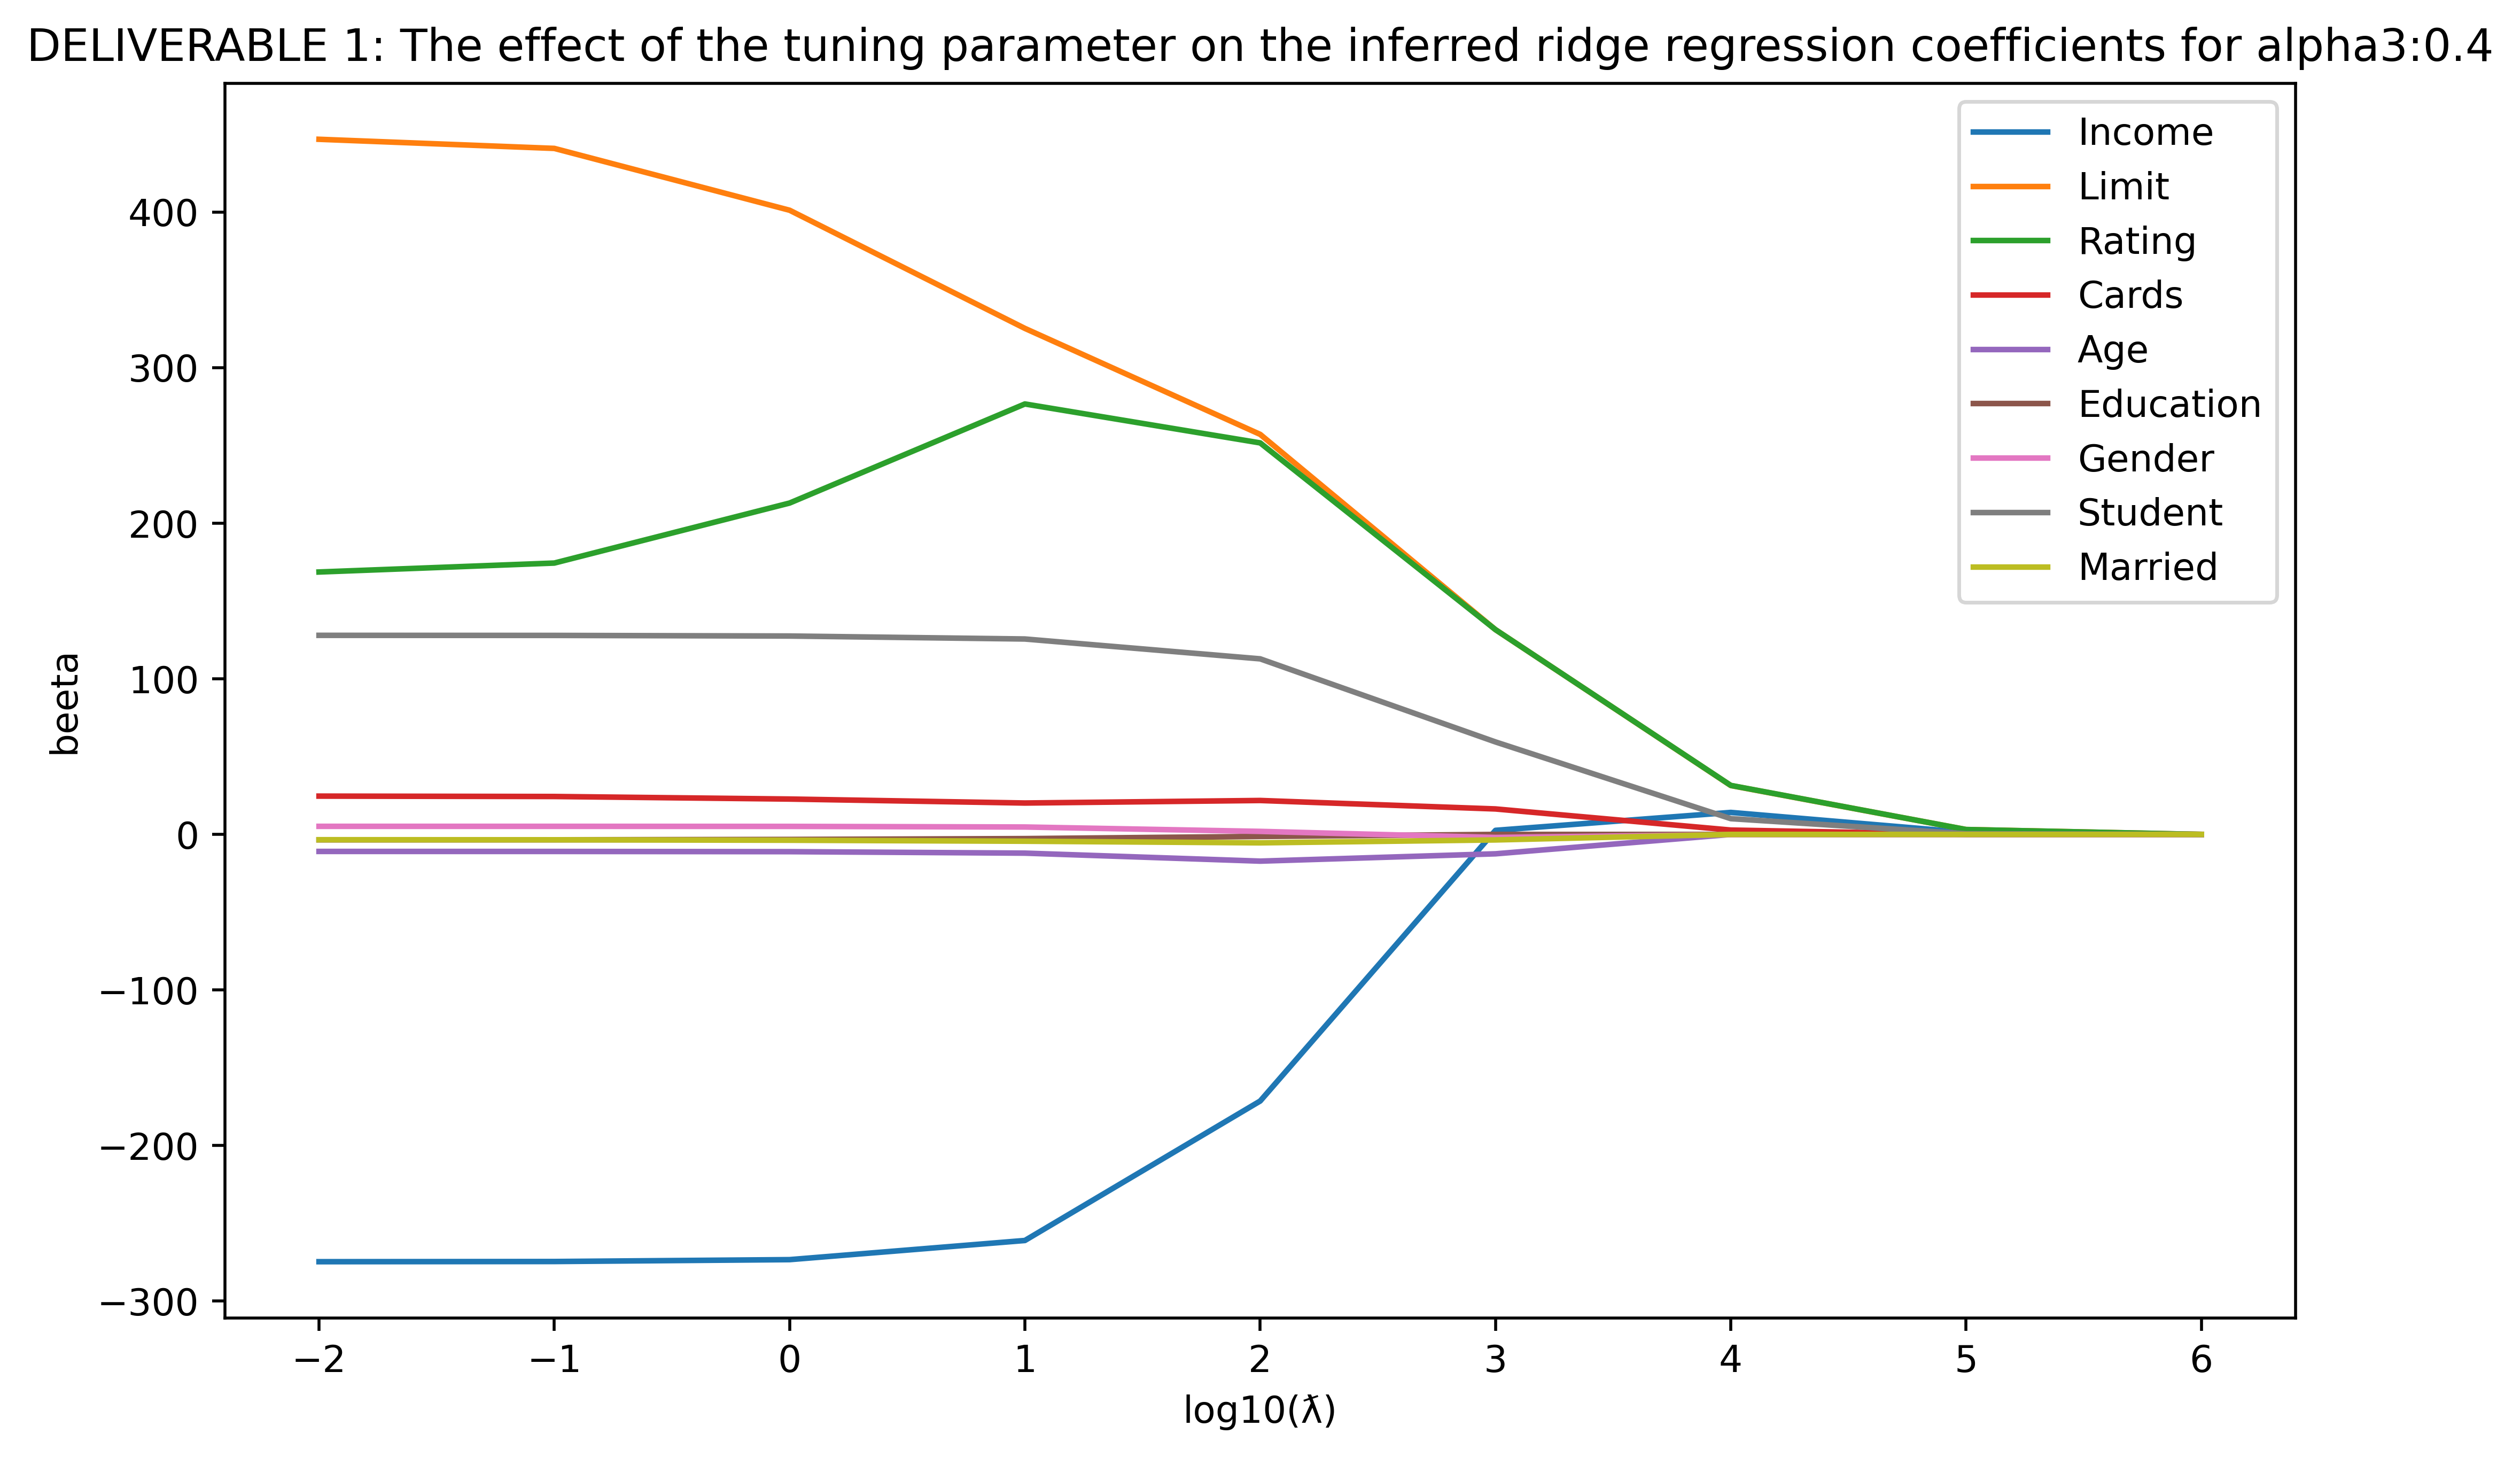

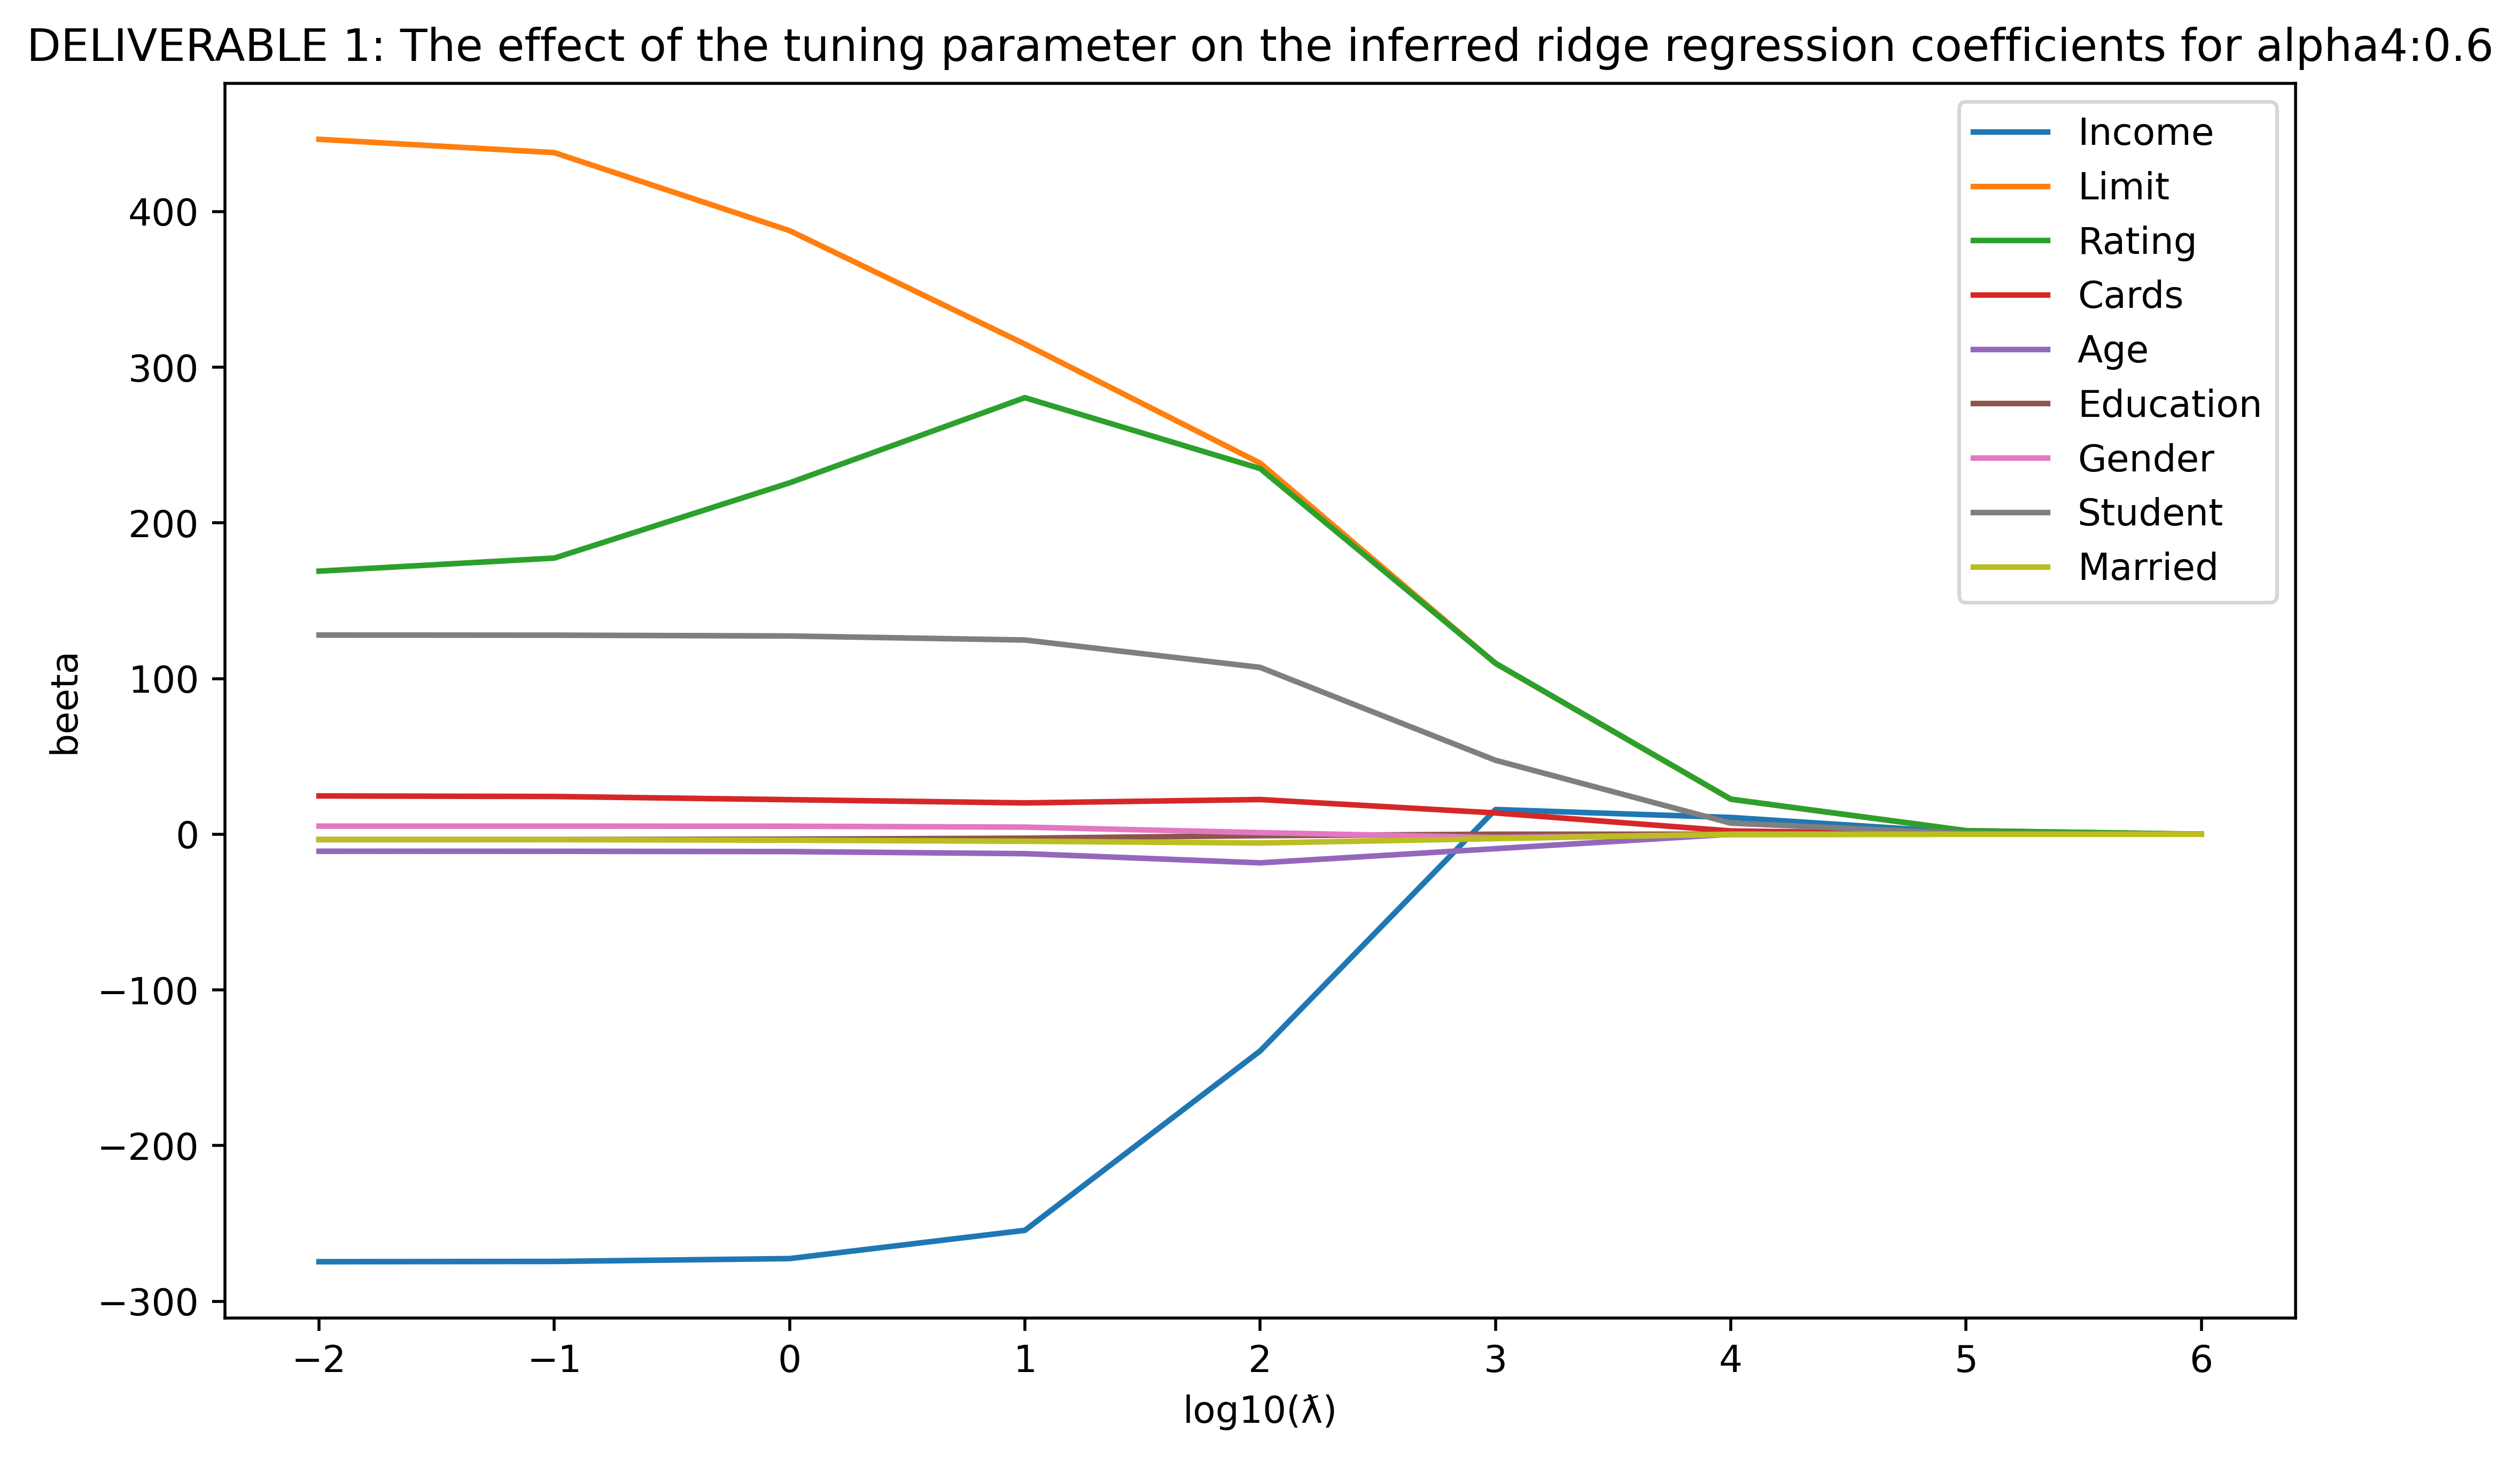

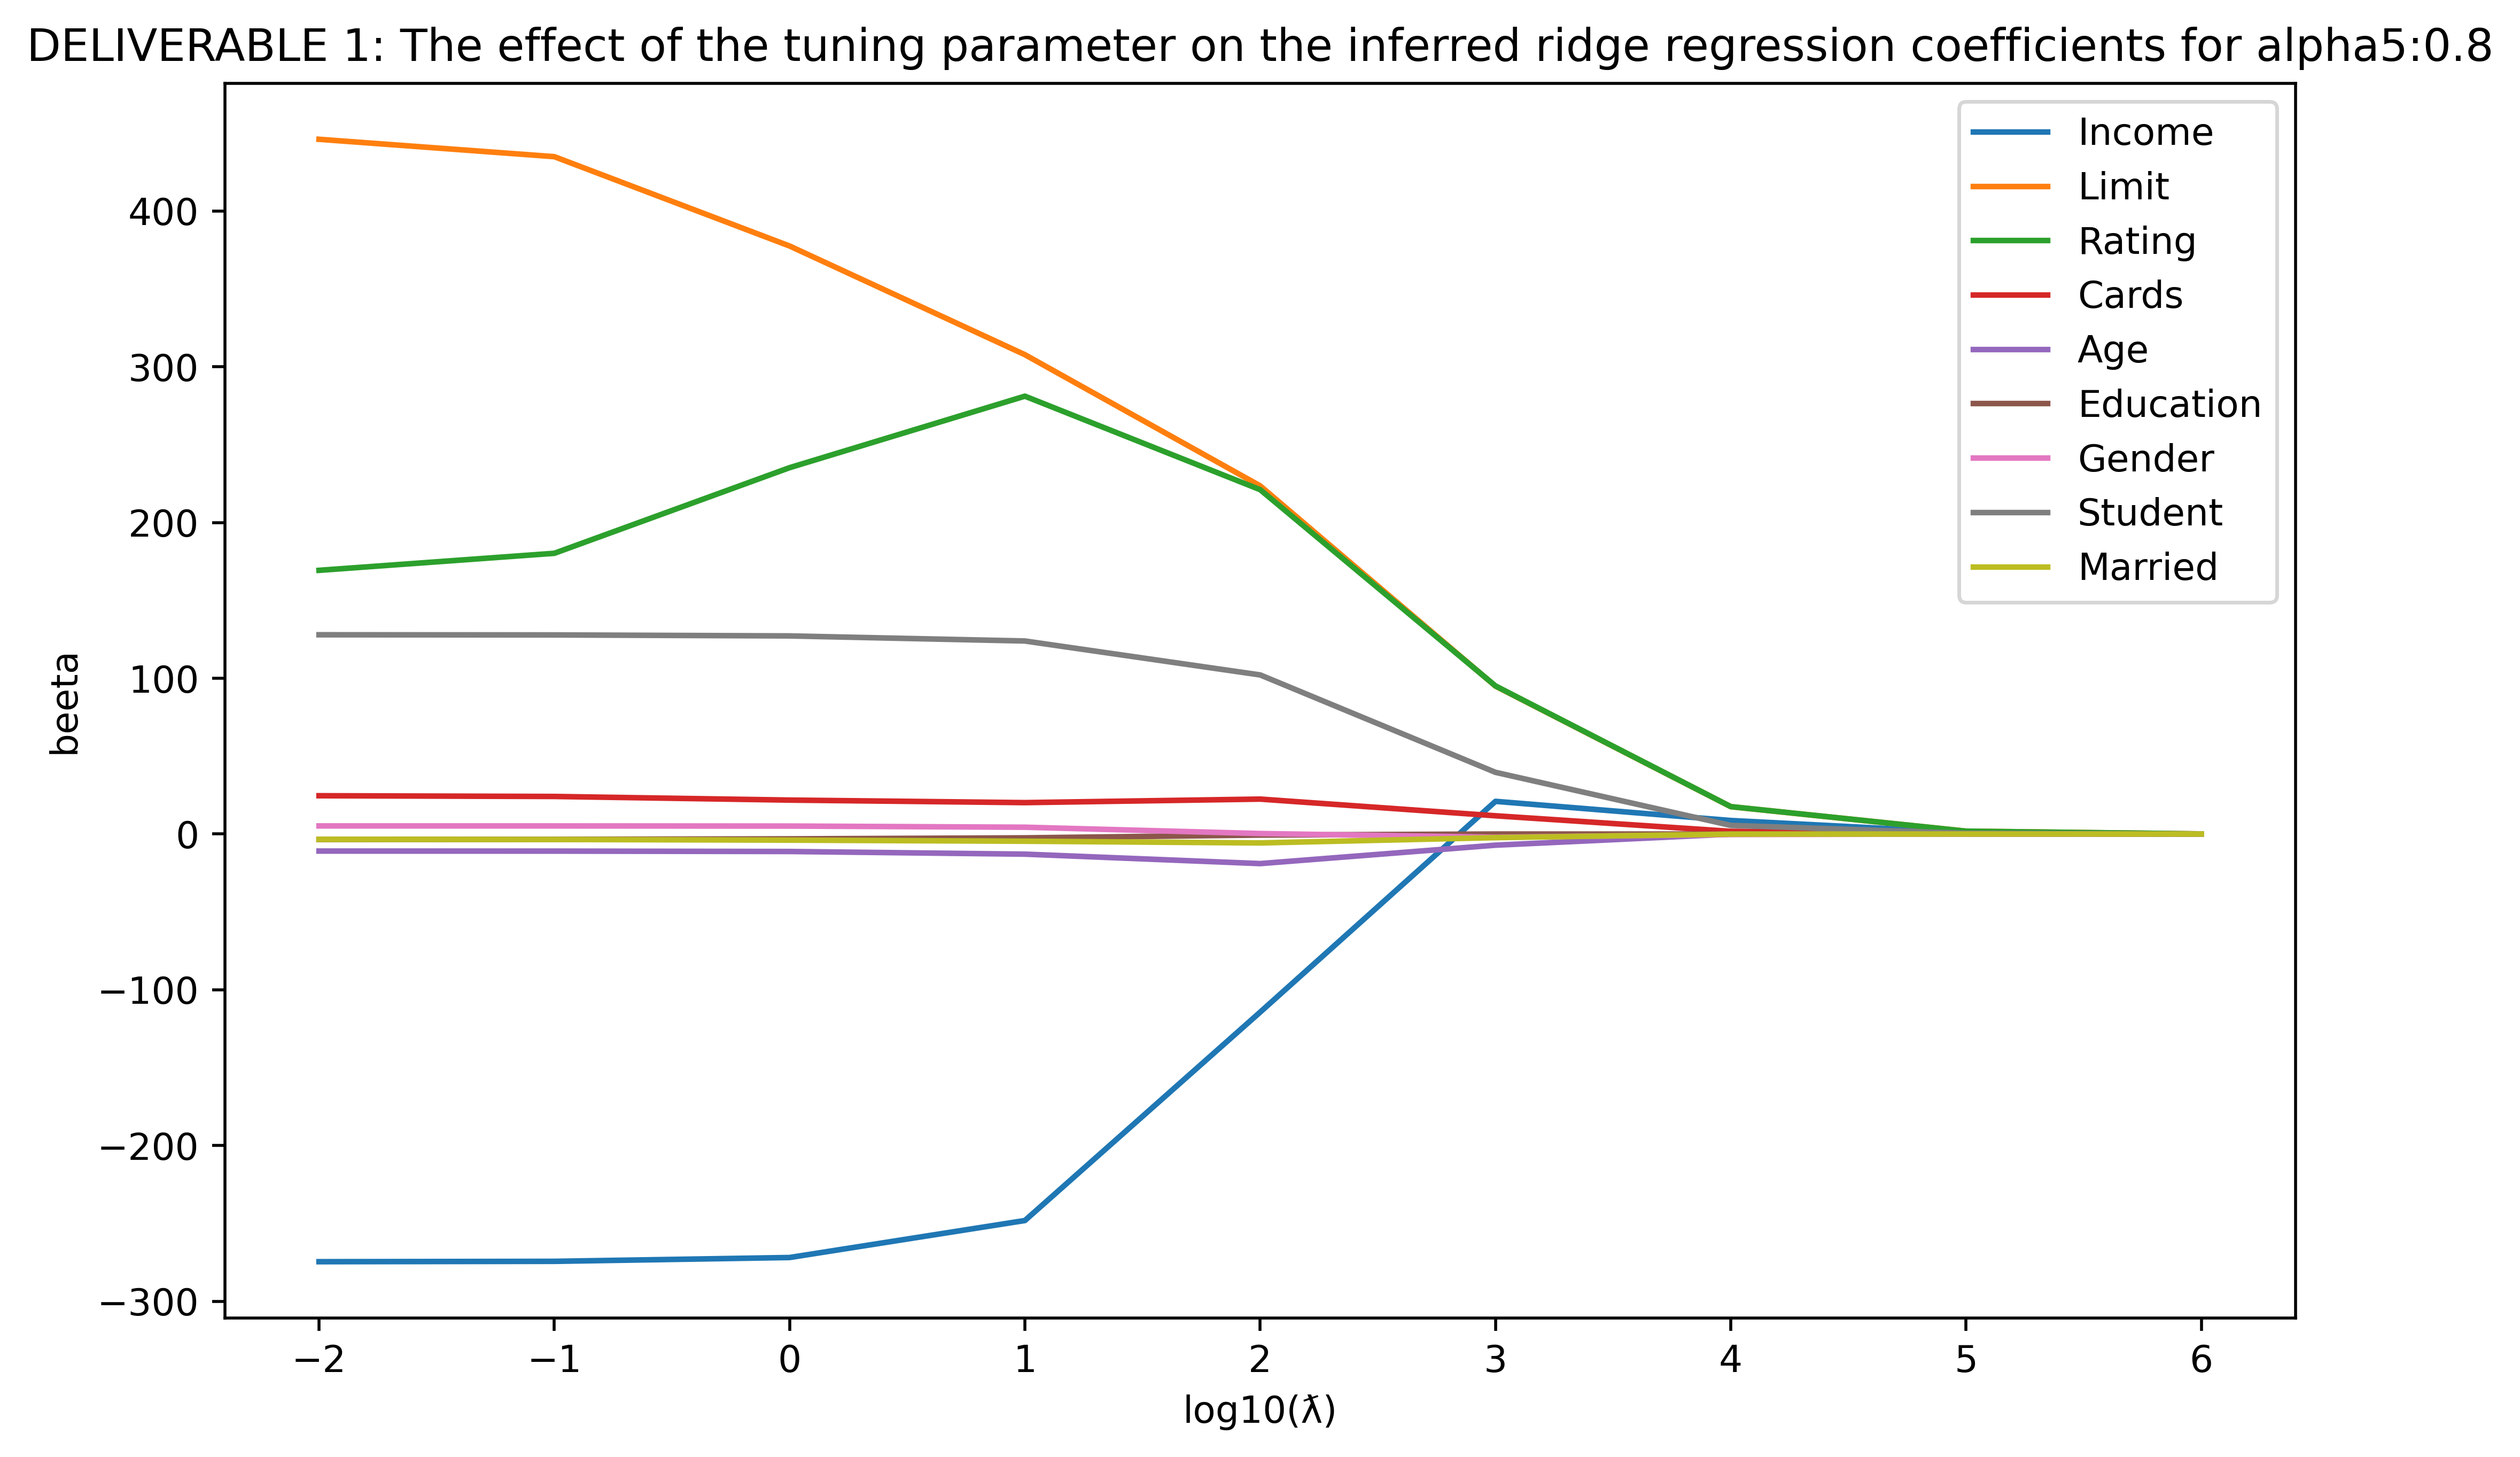

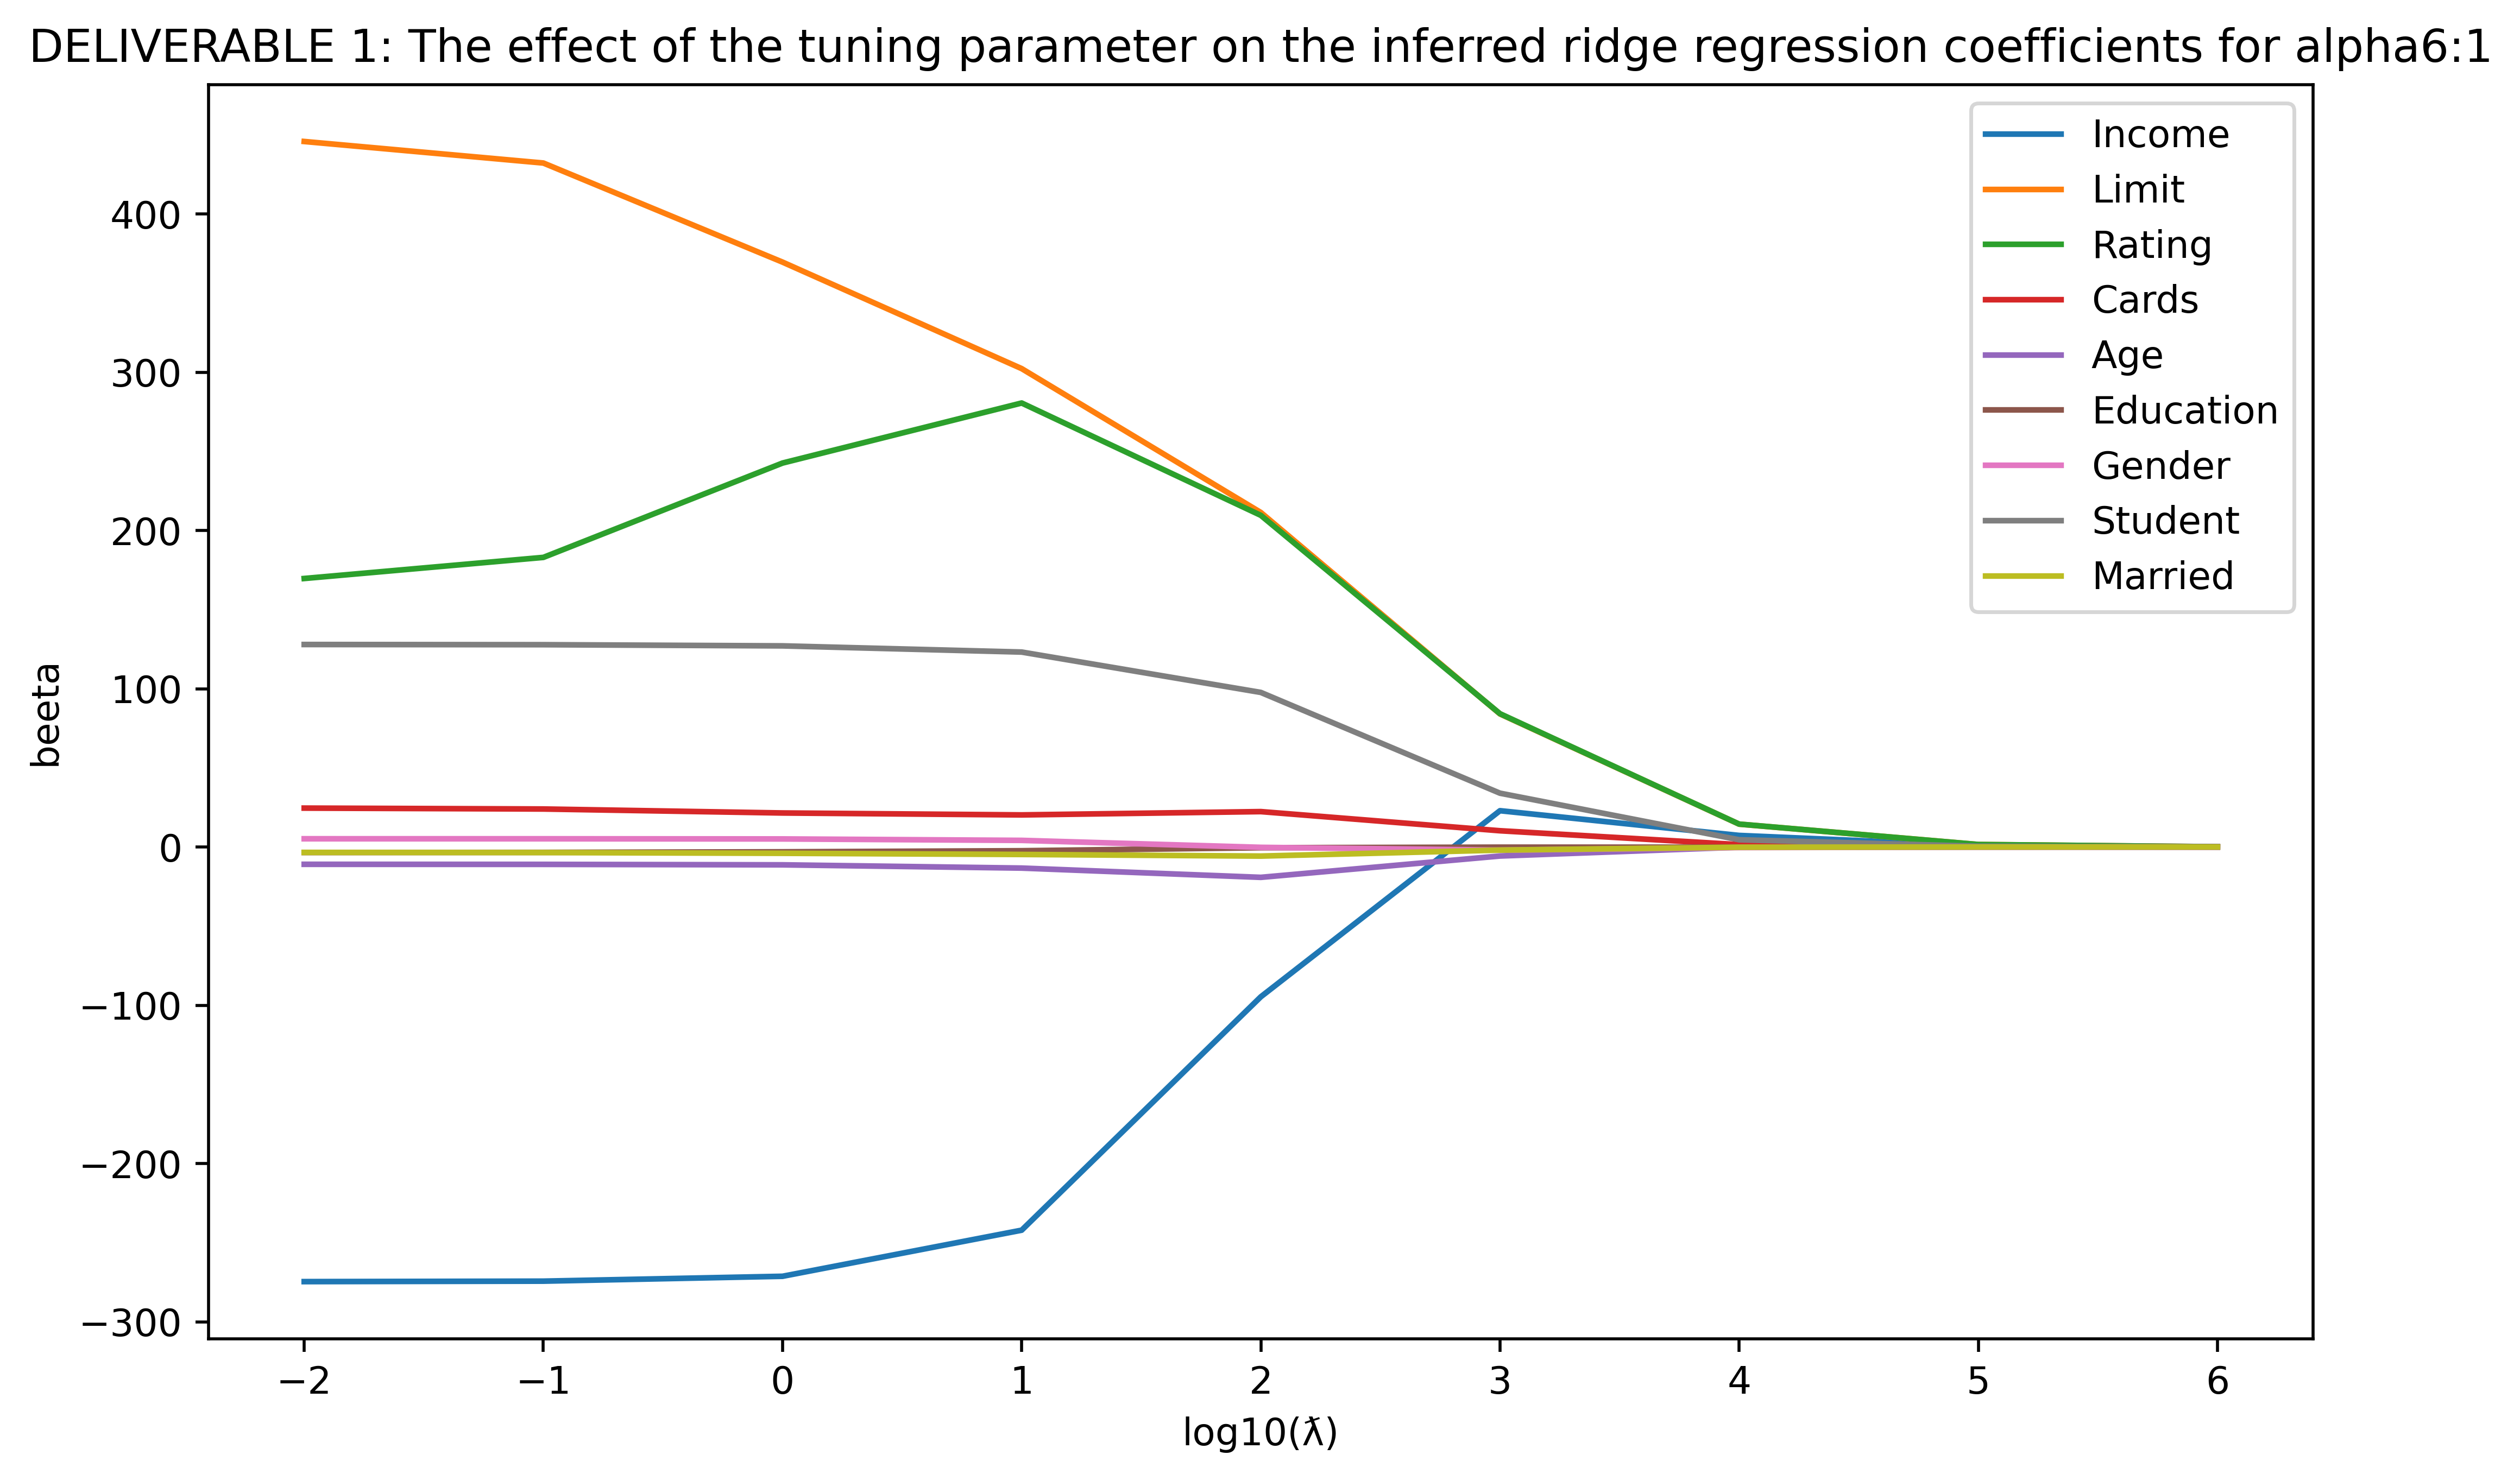

In [39]:
p_list = ['Income','Limit','Rating','Cards','Age','Education','Gender','Student','Married']
y = np.log10(lmbdas)
x = np.arange(-1,1)

count = 1
for i in range(len(alphas)):
    beta_0 = alphaLabels[i][:,0]  # Placeholder for beta_0 values
    beta_1 = alphaLabels[i][:,1]  # Placeholder for beta_1 values
    beta_2 = alphaLabels[i][:,2]  # Placeholder for beta_2 values
    beta_3 = alphaLabels[i][:,3]  # Placeholder for beta_3 values
    beta_4 = alphaLabels[i][:,4]  # Placeholder for beta_4 values
    beta_5 = alphaLabels[i][:,5]  # Placeholder for beta_5 values
    beta_6 = alphaLabels[i][:,6]  # Placeholder for beta_6 values
    beta_7 = alphaLabels[i][:,7]  # Placeholder for beta_7 values
    beta_8 = alphaLabels[i][:,8]  # Placeholder for beta_8 values

    plt.figure(figsize=(10,6),dpi=500)

    plt.plot(y,beta_0,label = p_list[0])
    plt.plot(y,beta_1,label = p_list[1])
    plt.plot(y,beta_2,label = p_list[2])
    plt.plot(y,beta_3,label = p_list[3])
    plt.plot(y,beta_4,label = p_list[4])
    plt.plot(y,beta_5,label = p_list[5])
    plt.plot(y,beta_6,label = p_list[6])
    plt.plot(y,beta_7,label = p_list[7])
    plt.plot(y,beta_8,label = p_list[8])

    plt.xlabel("log10(ƛ)") 
    plt.ylabel("beeta")
    plt.title(f'DELIVERABLE 1: The effect of the tuning parameter on the inferred ridge regression coefficients for alpha{i+1}:{alphas[i]}')
    plt.legend()

    # Show the plot
    plt.show()

In [40]:
indices = list(itertools.chain(range(0,len(D_matrix))))
random.shuffle(indices)

N= len(D_matrix1)

b1 = indices[0:int((N/5))]
b2 = indices[int(N/5):int(((2*N)/5))]
b3 = indices[int((2*N)/5):int(((3*N)/5))]
b4 = indices[int((3*N)/5):int(((4*N)/5))]
b5 = indices[int((4*N)/5):int(((5*N)/5))]


batch1 = [b1,b2+b3+b4+b5]
batch2 = [b2,b1+b3+b4+b5]
batch3 = [b3,b2+b1+b4+b5]
batch4 = [b4,b2+b3+b1+b5]
batch5 = [b5,b2+b3+b4+b1]

batches = [batch1,batch2,batch3,batch4,batch5]


lmbdacvvaluelist = []


for lmbda in lmbdas:
    cvvaluelist = []
    for alpha in alphas:
        cvvalue = CVCalculator(batches,lmbda,alpha,bk,D_matrix1,y_Matrix1,beeta_1)
        cvvaluelist.append(cvvalue)
    lmbdacvvaluelist.append(cvvaluelist)    
    
lmbdacvvaluelist = np.array(lmbdacvvaluelist) 


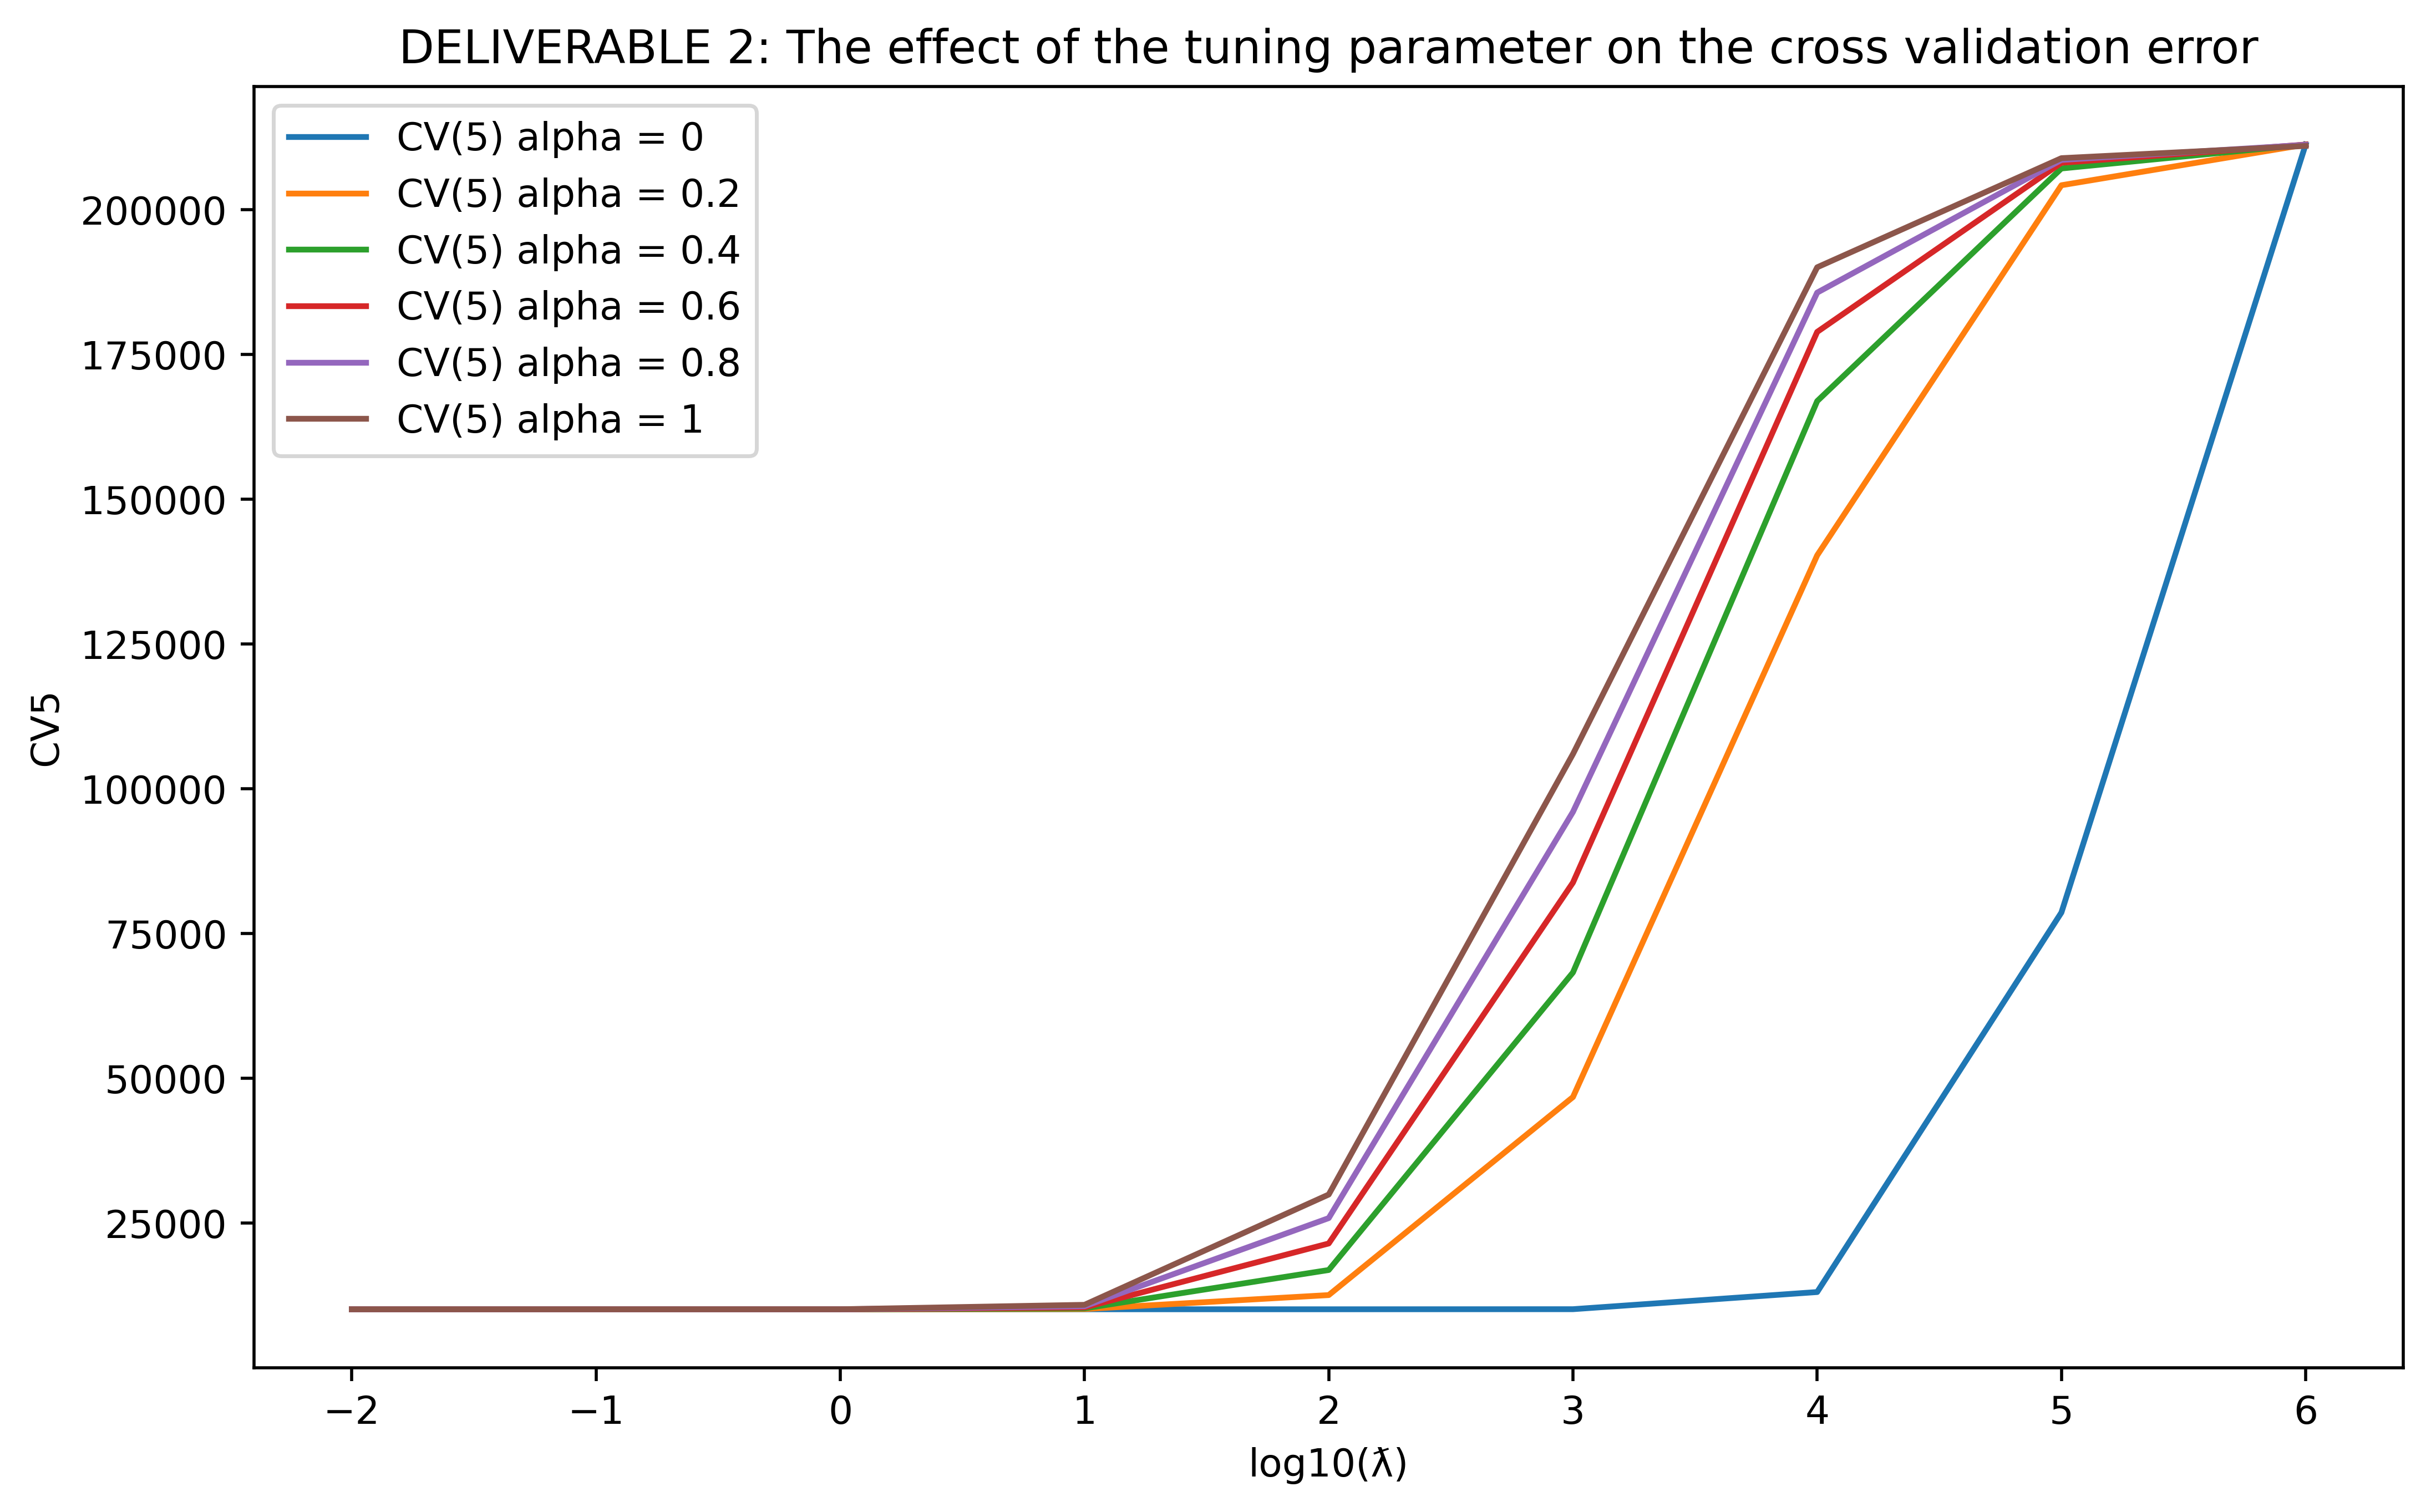

In [41]:
y = np.log10(lmbdas)

alpha_0 = lmbdacvvaluelist[:,0]  # Placeholder for beta_0 values
alpha_1 = lmbdacvvaluelist[:,1]  # Placeholder for beta_1 values
alpha_2 = lmbdacvvaluelist[:,2]  # Placeholder for beta_2 values
alpha_3 = lmbdacvvaluelist[:,3]  # Placeholder for beta_3 values
alpha_4 = lmbdacvvaluelist[:,4]  # Placeholder for beta_4 values
alpha_5 = lmbdacvvaluelist[:,5]  # Placeholder for beta_5 values


plt.figure(figsize=(10,6),dpi=500)

plt.plot(y,alpha_0,label = 'CV(5) alpha = 0')
plt.plot(y,alpha_1,label = 'CV(5) alpha = 0.2')
plt.plot(y,alpha_2,label = 'CV(5) alpha = 0.4')
plt.plot(y,alpha_3,label = 'CV(5) alpha = 0.6')
plt.plot(y,alpha_4,label = 'CV(5) alpha = 0.8')
plt.plot(y,alpha_5,label = 'CV(5) alpha = 1')


plt.xlabel("log10(ƛ)")  

plt.ylabel("CV5")

plt.title('DELIVERABLE 2: The effect of the tuning parameter on the cross validation error')
plt.legend()

In [42]:
alphastr = ['0','1/5','2/5','3/5','4/5','1']
lambdastr = ["10^(-2)","10^(-1)","10^(0)","10^(1)","10^(2)","10^(3)","10^(4)","10^(5)","10^(6)"]
lambda_alpha = np.argwhere(lmbdacvvaluelist == np.min(lmbdacvvaluelist))
print(f"DELIVERABLE 3: pair of values 𝜆 and 𝛼 that generated the smallest CV(5) error\nLambda value {lambdastr[lambda_alpha[0][0]]} & alpha value {alphas[lambda_alpha[0][1]]}")



DELIVERABLE 3: pair of values 𝜆 and 𝛼 that generated the smallest CV(5) error
Lambda value 10^(0) & alpha value 0.4


In [43]:
lmbdaIndex = lambda_alpha[0][0]
alphaIndex = lambda_alpha[0][1]

In [44]:
print(f"DELIVERABLE 4: best fit model parameter [alpha : {alphas[alphaIndex]} lambda : {lambdastr[lmbdaIndex]}]\n")

for v in range(len(alphaLabels[lmbdaIndex][alphaIndex])):
    print(p_list[v], ": ",alphaLabels[lmbdaIndex][alphaIndex][v])
    
    

DELIVERABLE 4: best fit model parameter [alpha : 0.4 lambda : 10^(0)]

Income :  -273.2935084480917
Limit :  401.173608730135
Rating :  212.9829318617605
Cards :  22.732540432406715
Age :  -11.084208566217754
Education :  -3.234074271594167
Gender :  5.157730308996843
Student :  127.51209672378488
Married :  -3.735688061303702


In [45]:
lambdaforalphaZero = np.argmin(lmbdacvvaluelist[:,0])
print ("Best tuning parameter for alpha = 0(lasso) is ",lambdastr[lambdaforalphaZero])
for v in range(len(alphaLabels[0][lambdaforalphaZero])):
    print(p_list[v], ": ",alphaLabels[0][lambdaforalphaZero][v])

Best tuning parameter for alpha = 0(lasso) is  10^(2)
Income :  -274.0564102853773
Limit :  445.98980999905746
Rating :  168.85962054641436
Cards :  24.504814144517905
Age :  -10.84230957277624
Education :  -3.360479988980734
Gender :  5.058720081438939
Student :  127.80119227184245
Married :  -3.3005735799322524


In [46]:
lambdaforalphaFive = np.argmin(lmbdacvvaluelist[:,5])
print ("Best tuning parameter for alpha = 1(ridge) is ",lambdastr[lambdaforalphaFive])
for v in range(len(alphaLabels[5][lambdaforalphaFive])):
    print(p_list[v], ": ",alphaLabels[5][lambdaforalphaFive][v])

Best tuning parameter for alpha = 1(ridge) is  10^(-1)
Income :  -274.30904099418177
Limit :  432.14854062789027
Rating :  182.98447915020546
Cards :  24.007522715997734
Age :  -10.973857717773027
Education :  -3.4086336929211365
Gender :  5.190057478292599
Student :  127.82203460253321
Married :  -3.5124128905671865


In [47]:
print(np.shape(alphaLabels))

(6, 9, 9)



the optimal condition that we got was, alpha = 0.4 and lambda = 10^0, which means that it is 40% ridge and 60% lasso
regresion for which we got a intermediate tuning parameter which makes the model with intermediate complexity

Case1 : when alpha is 0 the model becomes 100% lasso and therefore gives a higher value of tuning parameter making
the model less complex yet underfitting

Case2 : when alpha is 1 the model becomes 100% ridge and therefore gives a lower value of tuning parameter making
the model more complex yet overfitting
